## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.datasets import cifar10

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes=10)

In [13]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation = 'relu')(input_layer)
    x = keras.layers.Dense(units=256, activation = 'relu')(x)
    x = keras.layers.Dense(units=128, activation = 'relu')(x)
    out = keras.layers.Dense(units=10, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_8 (Dense)             (None, 512)               1573376   
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [23]:
"""
Compile 模型
"""
# optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='SGD')

In [24]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0689 - accuracy: 0.2622 - val_loss: 1.9564 - val_accuracy: 0.3048
Epoch 2/500
196/196 [==============================] - 3s 13ms/step - loss: 1.8868 - accuracy: 0.3346 - val_loss: 1.8848 - val_accuracy: 0.3332
Epoch 3/500
196/196 [==============================] - 2s 13ms/step - loss: 1.8209 - accuracy: 0.3586 - val_loss: 1.8523 - val_accuracy: 0.3258
Epoch 4/500
196/196 [==============================] - 3s 13ms/step - loss: 1.7775 - accuracy: 0.3738 - val_loss: 1.7499 - val_accuracy: 0.3828
Epoch 5/500
196/196 [==============================] - 3s 13ms/step - loss: 1.7395 - accuracy: 0.3869 - val_loss: 1.7536 - val_accuracy: 0.3860
Epoch 6/500
196/196 [==============================] - 3s 13ms/step - loss: 1.7098 - accuracy: 0.3993 - val_loss: 1.7781 - val_accuracy: 0.3576
Epoch 7/500
196/196 [==============================] - 3s 13ms/step - loss: 1.6803 - accuracy: 0.4077 - val_loss: 1.7127 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 1.1897 - accuracy: 0.5845 - val_loss: 1.4133 - val_accuracy: 0.4996
Epoch 58/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1922 - accuracy: 0.5813 - val_loss: 1.3729 - val_accuracy: 0.5077
Epoch 59/500
196/196 [==============================] - 3s 14ms/step - loss: 1.1880 - accuracy: 0.5845 - val_loss: 1.3712 - val_accuracy: 0.5149
Epoch 60/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1741 - accuracy: 0.5913 - val_loss: 1.4057 - val_accuracy: 0.5082
Epoch 61/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1734 - accuracy: 0.5886 - val_loss: 1.3602 - val_accuracy: 0.5158
Epoch 62/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1699 - accuracy: 0.5920 - val_loss: 1.3337 - val_accuracy: 0.5258
Epoch 63/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1622 - accuracy: 0.5927 - val_loss: 1.3947 - val_accuracy: 0.508

196/196 [==============================] - 3s 13ms/step - loss: 0.8849 - accuracy: 0.6935 - val_loss: 1.4116 - val_accuracy: 0.5209
Epoch 114/500
196/196 [==============================] - 3s 13ms/step - loss: 0.8794 - accuracy: 0.6929 - val_loss: 1.5218 - val_accuracy: 0.4959
Epoch 115/500
196/196 [==============================] - 3s 13ms/step - loss: 0.8791 - accuracy: 0.6955 - val_loss: 1.4876 - val_accuracy: 0.5061
Epoch 116/500
196/196 [==============================] - 3s 13ms/step - loss: 0.8581 - accuracy: 0.7028 - val_loss: 1.3907 - val_accuracy: 0.5322
Epoch 117/500
196/196 [==============================] - 3s 13ms/step - loss: 0.8636 - accuracy: 0.7000 - val_loss: 1.4705 - val_accuracy: 0.5136
Epoch 118/500
196/196 [==============================] - 3s 13ms/step - loss: 0.8588 - accuracy: 0.7011 - val_loss: 1.4518 - val_accuracy: 0.5138
Epoch 119/500
196/196 [==============================] - 3s 13ms/step - loss: 0.8548 - accuracy: 0.7003 - val_loss: 1.6407 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.6041 - accuracy: 0.7921 - val_loss: 1.7513 - val_accuracy: 0.4914
Epoch 170/500
196/196 [==============================] - 3s 13ms/step - loss: 0.5942 - accuracy: 0.7962 - val_loss: 1.5150 - val_accuracy: 0.5283
Epoch 171/500
196/196 [==============================] - 3s 13ms/step - loss: 0.5856 - accuracy: 0.8007 - val_loss: 2.0698 - val_accuracy: 0.4583
Epoch 172/500
196/196 [==============================] - 3s 13ms/step - loss: 0.5945 - accuracy: 0.7949 - val_loss: 1.6540 - val_accuracy: 0.5065
Epoch 173/500
196/196 [==============================] - 3s 14ms/step - loss: 0.5821 - accuracy: 0.8030 - val_loss: 1.8964 - val_accuracy: 0.4761
Epoch 174/500
196/196 [==============================] - 3s 14ms/step - loss: 0.5768 - accuracy: 0.8055 - val_loss: 1.6011 - val_accuracy: 0.5348
Epoch 175/500
196/196 [==============================] - 3s 13ms/step - loss: 0.5740 - accuracy: 0.8027 - val_loss: 1.7152 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.3439 - accuracy: 0.8910 - val_loss: 1.8330 - val_accuracy: 0.5243
Epoch 226/500
196/196 [==============================] - 3s 14ms/step - loss: 0.3679 - accuracy: 0.8807 - val_loss: 1.8173 - val_accuracy: 0.5251
Epoch 227/500
196/196 [==============================] - 3s 14ms/step - loss: 0.3256 - accuracy: 0.8974 - val_loss: 1.8531 - val_accuracy: 0.5349
Epoch 228/500
196/196 [==============================] - 3s 14ms/step - loss: 0.3295 - accuracy: 0.8960 - val_loss: 1.8361 - val_accuracy: 0.5262
Epoch 229/500
196/196 [==============================] - 3s 13ms/step - loss: 0.3583 - accuracy: 0.8904 - val_loss: 2.1960 - val_accuracy: 0.4768
Epoch 230/500
196/196 [==============================] - 3s 13ms/step - loss: 0.3404 - accuracy: 0.8932 - val_loss: 2.0204 - val_accuracy: 0.5071
Epoch 231/500
196/196 [==============================] - 3s 13ms/step - loss: 0.3049 - accuracy: 0.9058 - val_loss: 2.1429 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.2062 - accuracy: 0.9444 - val_loss: 2.2167 - val_accuracy: 0.5003
Epoch 282/500
196/196 [==============================] - 3s 14ms/step - loss: 0.1894 - accuracy: 0.9502 - val_loss: 2.1559 - val_accuracy: 0.5099
Epoch 283/500
196/196 [==============================] - 3s 14ms/step - loss: 0.2101 - accuracy: 0.9426 - val_loss: 2.2653 - val_accuracy: 0.5274
Epoch 284/500
196/196 [==============================] - 3s 14ms/step - loss: 0.1948 - accuracy: 0.9488 - val_loss: 2.1829 - val_accuracy: 0.5394
Epoch 285/500
196/196 [==============================] - 3s 14ms/step - loss: 0.2598 - accuracy: 0.9316 - val_loss: 2.2300 - val_accuracy: 0.5298
Epoch 286/500
196/196 [==============================] - 3s 14ms/step - loss: 0.1596 - accuracy: 0.9581 - val_loss: 2.2212 - val_accuracy: 0.5240
Epoch 287/500
196/196 [==============================] - 3s 14ms/step - loss: 0.1743 - accuracy: 0.9553 - val_loss: 2.6991 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 0.0948 - accuracy: 0.9795 - val_loss: 2.4538 - val_accuracy: 0.5440
Epoch 338/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0484 - accuracy: 0.9944 - val_loss: 2.4769 - val_accuracy: 0.5434
Epoch 339/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0446 - accuracy: 0.9952 - val_loss: 2.4868 - val_accuracy: 0.5470
Epoch 340/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0436 - accuracy: 0.9952 - val_loss: 2.5163 - val_accuracy: 0.5373
Epoch 341/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0436 - accuracy: 0.9947 - val_loss: 2.5774 - val_accuracy: 0.5401
Epoch 342/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0405 - accuracy: 0.9961 - val_loss: 2.6186 - val_accuracy: 0.5319
Epoch 343/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0404 - accuracy: 0.9958 - val_loss: 2.6579 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.2145 - accuracy: 0.9502 - val_loss: 2.5920 - val_accuracy: 0.5306
Epoch 394/500
196/196 [==============================] - 3s 14ms/step - loss: 0.1425 - accuracy: 0.9677 - val_loss: 2.6002 - val_accuracy: 0.5413
Epoch 395/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0397 - accuracy: 0.9970 - val_loss: 2.6516 - val_accuracy: 0.5320
Epoch 396/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0368 - accuracy: 0.9974 - val_loss: 2.6490 - val_accuracy: 0.5346
Epoch 397/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0342 - accuracy: 0.9979 - val_loss: 2.6944 - val_accuracy: 0.5340
Epoch 398/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0331 - accuracy: 0.9979 - val_loss: 2.6813 - val_accuracy: 0.5323
Epoch 399/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0319 - accuracy: 0.9982 - val_loss: 2.6861 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.0171 - accuracy: 0.9996 - val_loss: 2.8950 - val_accuracy: 0.5360
Epoch 450/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0164 - accuracy: 0.9997 - val_loss: 2.9067 - val_accuracy: 0.5395
Epoch 451/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0163 - accuracy: 0.9996 - val_loss: 2.9206 - val_accuracy: 0.5337
Epoch 452/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0158 - accuracy: 0.9997 - val_loss: 2.9129 - val_accuracy: 0.5382
Epoch 453/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0154 - accuracy: 0.9997 - val_loss: 2.9314 - val_accuracy: 0.5403
Epoch 454/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0152 - accuracy: 0.9997 - val_loss: 2.9354 - val_accuracy: 0.5376
Epoch 455/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0148 - accuracy: 0.9998 - val_loss: 2.9415 - val_accuracy:

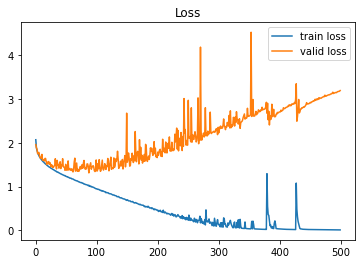

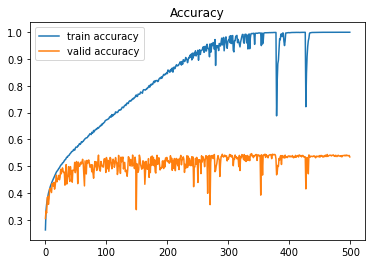

In [25]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()